In [3]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

Exercise 2 
Write a class called SawtoothChirp that extends Chirp and overrides evaluate to generate a sawtooth waveform with frequency that increases (or decreases) linearly.
Hint: combine the evaluate functions from Chirp and SawtoothSignal.
Draw a sketch of what you think the spectrogram of this signal looks like, and then plot it. The effect of aliasing should be visually apparent, and if you listen carefully, you can hear it.

編寫一個名為SawtoothChirp的class，該class擴展Chirp並覆蓋求值以生成頻率線性增加（或減小）的鋸齒波形。
提示：結合使用Chirp和SawtoothSignal的評估函數。
畫出您認為該信號的頻譜圖的草圖，然後將其繪製出來。混疊的效果應該在視覺上顯而易見，並且如果仔細聆聽，則可以聽到。

class擴展Chirp並覆蓋求值

In [4]:
from thinkdsp import Chirp
from thinkdsp import normalize, unbias

PI2 = 2 * np.pi

class SawtoothChirp(Chirp):
    """Represents a sawtooth signal with varying frequency."""

    def _evaluate(self, ts, freqs):
        """Helper function that evaluates the signal.

        ts: float array of times
        freqs: float array of frequencies during each interval
        """
        dts = np.diff(ts) #計算ts裡相鄰兩個元素的差，回傳每個間隔的長度(s)
        dps = PI2 * freqs * dts #相位
        phases = np.cumsum(dps)#類似積分概念
        phases = np.insert(phases, 0, 0)#因為可能少0所以要補上
        cycles = phases / PI2
        frac, _ = np.modf(cycles)
        ys =  normalize(unbias(frac), self.amp)
        return ys

In [5]:
signal = SawtoothChirp(start=220, end=880)#頻率
wave = signal.make_wave(duration=1, framerate=4000)
wave.apodize()
wave.make_audio()

信號頻譜
生成頻率線性增加的鋸齒波形

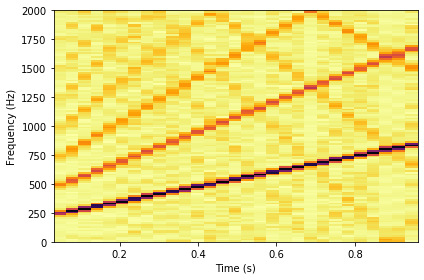

In [6]:
sp = wave.make_spectrogram(256)
sp.plot()
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

In [7]:
from thinkdsp import read_wave

read_wave('tos-redalert.wav').make_audio()